### 1. Основи попереднього аналізу даних

#### Що таке попередній аналіз даних?
Попередній аналіз даних (Preliminary Data Analysis, PDA) є початковим етапом в обробці даних, під час якого оцінюються структура, обсяг, характер та якість наявних даних. Мета цього процесу — підготувати дані для подальших етапів обробки, таких як моделювання або аналітичні прогнози. Він дозволяє виявити аномалії, відхилення або інші можливі проблеми, які можуть вплинути на точність майбутніх висновків.

Попередній аналіз даних включає такі основні кроки:
- **Очищення даних** (видалення дублікатів, відсутніх значень та некоректних записів).
- **Описова статистика** (середнє значення, медіана, мода, стандартне відхилення тощо).
- **Візуалізація даних** (графіки та діаграми для виявлення тенденцій та розподілів).
- **Перевірка відповідності даних** (чи відповідають дані вимогам для подальшої обробки).

### Бібліотеки, що використовуються для попереднього аналізу даних

Для виконання попереднього аналізу даних в Python найчастіше використовуються наступні бібліотеки:

1. **Pandas** – бібліотека для роботи з табличними даними, яка дозволяє легко завантажувати, обробляти, фільтрувати та трансформувати дані.
2. **NumPy** – використовується для математичних операцій і роботи з багатовимірними масивами, що необхідні для обробки числових даних.
3. **Matplotlib** та **Seaborn** – інструменти для візуалізації даних. Matplotlib дозволяє створювати базові графіки, а Seaborn — більш деталізовані та інформативні візуалізації.
4. **Scipy** – бібліотека для наукових розрахунків, яка включає функціонал для виконання статистичного аналізу даних.
5. **Sklearn** – корисна для виконання початкових етапів машинного навчання, зокрема для попереднього аналізу розподілів і характеристик даних перед тренуванням моделей.


In [10]:
import pandas as pd
import numpy as np

# Створення DataFrame (CREATE)
data = {
    'Student_ID': [1, 2, 3, 4, 5],
    'Hours_Studied': [5, 10, 3, 8, 7],
    'Exam_Score': [50, 80, 40, 75, 65],
    'Attendance': [80, 95, 60, 90, 85]
}
df = pd.DataFrame(data)


In [2]:
df

,Student_ID,Hours_Studied,Exam_Score,Attendance
0,1,5,50,80
1,2,10,80,95
2,3,3,40,60
3,4,8,75,90
4,5,7,65,85


In [ ]:

# Операція READ: перегляд перших кількох рядків DataFrame
print("Перегляд перших рядків DataFrame:")
print(df.head())

# Операція CREATE: додавання нового стовпця на основі інших даних
df['Performance'] = np.where(df['Exam_Score'] >= 60, 'Pass', 'Fail')
print("\nДодавання нового стовпця 'Performance':")
print(df)

# Операція UPDATE: зміна даних у стовпці 'Hours_Studied'
df.loc[df['Student_ID'] == 3, 'Hours_Studied'] = 6
print("\nОновлення даних (зміна 'Hours_Studied' для студента з ID = 3):")
print(df)

# Операція UPDATE: зміна кількох рядків на основі умов
df.loc[df['Attendance'] < 70, 'Attendance'] = 70
print("\nОновлення кількох рядків на основі умов ('Attendance' < 70):")
print(df)

# Операція DELETE: видалення стовпця
df.drop('Performance', axis=1, inplace=True)
print("\nВидалення стовпця 'Performance':")
print(df)

# Операція DELETE: видалення рядків, де 'Exam_Score' менше 50
df = df[df['Exam_Score'] >= 50]
print("\nВидалення рядків, де 'Exam_Score' менше 50:")
print(df)

# Операція CREATE: додавання нового рядка за допомогою concat
new_row = pd.DataFrame({'Student_ID': [6], 'Hours_Studied': [9], 'Exam_Score': [78], 'Attendance': [88]})
df = pd.concat([df, new_row], ignore_index=True)
print("\nДодавання нового рядка:")
print(df)

# Операція з NumPy: обчислення середнього значення екзаменаційного балу
mean_exam_score = np.mean(df['Exam_Score'])
print(f"\nСередній екзаменаційний бал: {mean_exam_score}")

# Операція з NumPy: обчислення медіани кількості годин навчання
median_hours_studied = np.median(df['Hours_Studied'])
print(f"Медіана кількості годин навчання: {median_hours_studied}")


Ось детальний приклад коду для попереднього аналізу даних з використанням основних бібліотек Python: **Pandas**, **NumPy**, **Matplotlib**, і **Seaborn**, з відповідними поясненнями.

### 1. Використання **Pandas** для завантаження та обробки даних

Pandas використовується для роботи з табличними даними (дані, що зберігаються в CSV-файлах або Excel-таблицях). Основні операції включають завантаження даних, очищення і фільтрацію.

```python
import pandas as pd

# Завантаження даних із CSV файлу
data = pd.read_csv('StudentPerformanceFactors.csv')

# Перегляд перших 5 рядків таблиці
print(data.head())

# Перевірка наявності пропущених значень
print("Пропущені значення:")
print(data.isnull().sum())

# Видалення дублікатів
data = data.drop_duplicates()

# Заповнення пропущених значень для колонок 'Teacher_Quality' та 'Parental_Education_Level'
data['Teacher_Quality'].fillna('Unknown', inplace=True)
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0], inplace=True)

# Описова статистика для числових змінних
print("\nОписова статистика:")
print(data.describe())
```

### 2. Використання **NumPy** для математичних операцій

NumPy дозволяє працювати з багатовимірними масивами та виконувати складні математичні операції. У цьому прикладі ми використаємо його для обчислення середнього значення, стандартного відхилення і медіани.

```python
import numpy as np

# Обчислення середнього значення для екзаменаційних балів
mean_exam_score = np.mean(data['Exam_Score'])
print(f"Середній бал на екзамені: {mean_exam_score}")

# Обчислення медіани для кількості годин навчання
median_hours_studied = np.median(data['Hours_Studied'])
print(f"Медіана годин навчання: {median_hours_studied}")

# Обчислення стандартного відхилення для екзаменаційних балів
std_exam_score = np.std(data['Exam_Score'])
print(f"Стандартне відхилення балів на екзамені: {std_exam_score}")
```

### 3. Використання **Matplotlib** та **Seaborn** для візуалізації даних

Ці дві бібліотеки використовуються для створення графіків і діаграм, які допомагають візуально аналізувати дані.

#### **Matplotlib** – Створення базових графіків:

```python
import matplotlib.pyplot as plt

# Гістограма для кількості годин навчання
plt.figure(figsize=(8,6))
plt.hist(data['Hours_Studied'], bins=15, color='skyblue')
plt.title('Гістограма кількості годин навчання')
plt.xlabel('Години навчання')
plt.ylabel('Кількість студентів')
plt.show()

# Лінійний графік для екзаменаційних балів
plt.figure(figsize=(8,6))
plt.plot(data['Exam_Score'], color='green')
plt.title('Лінійний графік екзаменаційних балів')
plt.xlabel('Студенти')
plt.ylabel('Екзаменаційні бали')
plt.show()
```

#### **Seaborn** – Більш складні та інформативні візуалізації:

Seaborn базується на Matplotlib і надає більш високий рівень абстракції для створення детальніших графіків.

```python
import seaborn as sns

# Гістограма для екзаменаційних балів з ядровою оцінкою щільності
plt.figure(figsize=(8,6))
sns.histplot(data['Exam_Score'], bins=15, kde=True, color='orange')
plt.title('Гістограма екзаменаційних балів з KDE')
plt.xlabel('Екзаменаційні бали')
plt.ylabel('Кількість студентів')
plt.show()

# Boxplot для кількості годин навчання залежно від екзаменаційних балів
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Exam_Score'], y=data['Hours_Studied'], palette='coolwarm')
plt.title('Boxplot годин навчання залежно від екзаменаційних балів')
plt.show()

# Кореляційна матриця з тепловою картою
plt.figure(figsize=(10,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()
```

### Опис використаних бібліотек:
1. **Pandas**:
   - **read_csv**: Завантажує дані з CSV-файлу у форматі DataFrame.
   - **head()**: Виводить перші рядки таблиці.
   - **describe()**: Описова статистика для числових змінних.
   - **drop_duplicates()**: Видаляє дублікатори з набору даних.
   
2. **NumPy**:
   - **mean()**: Обчислює середнє значення.
   - **median()**: Обчислює медіану.
   - **std()**: Обчислює стандартне відхилення.

3. **Matplotlib**:
   - **hist()**: Створює гістограму.
   - **plot()**: Створює лінійний графік.
   
4. **Seaborn**:
   - **histplot()**: Створює гістограму з опціональним ядровим оцінювачем щільності.
   - **boxplot()**: Створює boxplot для виявлення викидів та оцінки розподілу.
   - **heatmap()**: Створює теплову карту для візуалізації кореляційної матриці.

Ці приклади показують, як можна ефективно використовувати основні бібліотеки для проведення попереднього аналізу даних, починаючи від завантаження та очищення даних до їх візуалізації.

In [3]:
df.head(3)

,Student_ID,Hours_Studied,Exam_Score,Attendance
0,1,5,50,80
1,2,10,80,95
2,3,3,40,60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Student_ID     5 non-null      int64
 1   Hours_Studied  5 non-null      int64
 2   Exam_Score     5 non-null      int64
 3   Attendance     5 non-null      int64
dtypes: int64(4)
memory usage: 292.0 bytes


In [5]:
df.describe()

,Student_ID,Hours_Studied,Exam_Score,Attendance
count,5.000000,5.000000,5.000000,5.000000
mean,3.000000,6.600000,62.000000,82.000000
std,1.581139,2.701851,16.807736,13.509256
min,1.000000,3.000000,40.000000,60.000000
25%,2.000000,5.000000,50.000000,80.000000
50%,3.000000,7.000000,65.000000,85.000000
75%,4.000000,8.000000,75.000000,90.000000
max,5.000000,10.000000,80.000000,95.000000


In [6]:
df.shape

(5, 4)

In [11]:
df.columns

Index(['Student_ID', 'Hours_Studied', 'Exam_Score', 'Attendance'], dtype='object')

In [12]:
df_corr = df[['Hours_Studied', 'Exam_Score', 'Attendance']].corr()
df_corr

,Hours_Studied,Exam_Score,Attendance
Hours_Studied,1.000000,0.985422,0.952055
Exam_Score,0.985422,1.000000,0.941381
Attendance,0.952055,0.941381,1.000000


In [ ]:
%pip install seaborn

<Axes: >

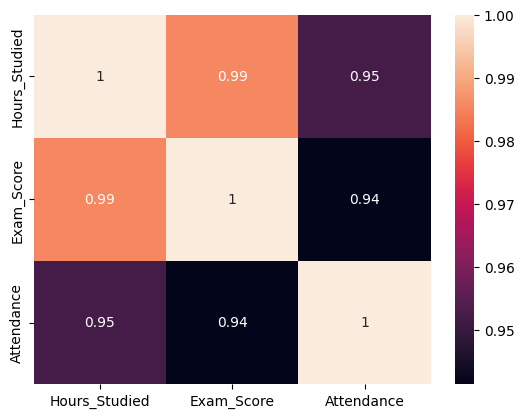

In [15]:
import seaborn as sns

sns.heatmap(df_corr, annot=True)


In [18]:
df1 = pd.read_csv('StudentPerformanceFactors.csv')

In [19]:
df1.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [20]:
df1.shape

(6607, 20)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [22]:
df1.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [23]:
df1.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [24]:
df1_corr = df1[['Hours_Studied', 'Attendance', 'Sleep_Hours',
       'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']].corr()

<Axes: >

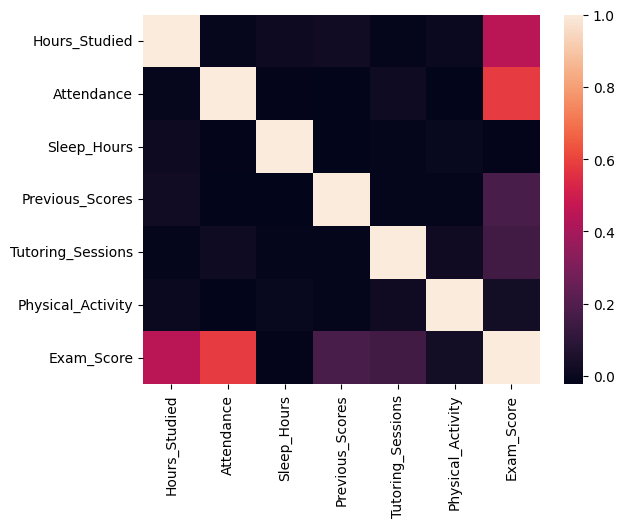

In [25]:
sns.heatmap(df1_corr)

In [29]:
df1.describe(include=["object", "bool"])

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [33]:
df1["Peer_Influence"].value_counts()

Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64

In [34]:
df.dtypes

Student_ID       int64
Hours_Studied    int64
Exam_Score       int64
Attendance       int64
dtype: object

In [35]:
df1.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [40]:
import matplotlib.pyplot as plt

<Axes: xlabel='Attendance', ylabel='Count'>

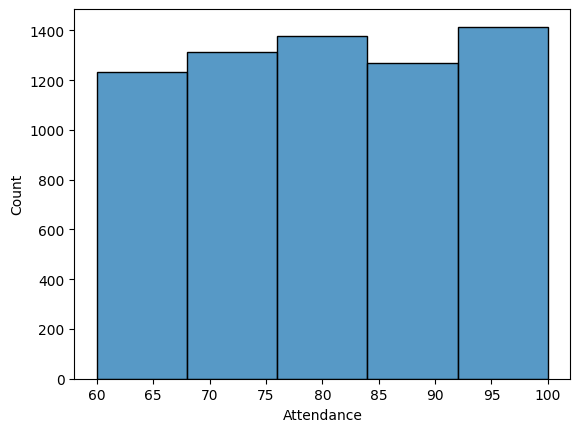

In [44]:
sns.histplot(df1['Attendance'], bins=5)


<Axes: xlabel='Sleep_Hours'>

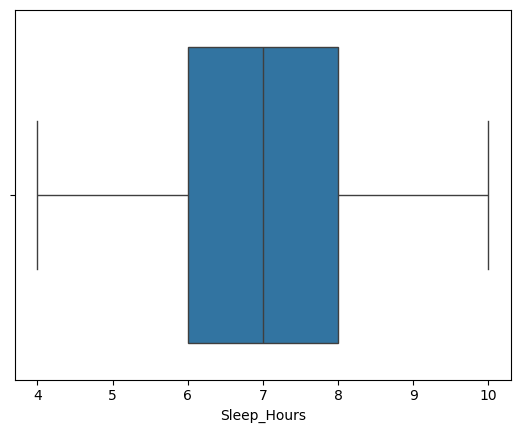

In [46]:
sns.boxplot(x=df1['Sleep_Hours'])